<a href="https://colab.research.google.com/github/veyselberk88/Data-Science-Tools-and-Ecosystem/blob/main/lec23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="./ccsf.png" alt="CCSF Logo" width=200px style="margin:0px -5px">

# Lecture 23: Hypothesis Testing Examples

Associated Textbook Sections: [12.3](https://ccsf-math-108.github.io/textbook/chapters/12/3/Deflategate.html)

---

## Outline

* [Benford's Law](#Benford's-Law)
* [Therapy Recovery Time](#Therapy-Recovery-Time)

---

## Set Up the Notebook

In [ ]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

---

## Benford's Law

> [Benford's law](https://en.wikipedia.org/wiki/Benford%27s_law), also known as the Newcomb-Benford law, the law of anomalous numbers, or the first-digit law, is an observation that in many real-life sets of numerical data, the leading digit is likely to be small. Benford's law tends to apply most accurately to data that span several orders of magnitude. As a rule of thumb, the more orders of magnitude that the data evenly covers, the more accurately Benford's law applies.

---

Observe the distribution of the first digits of numbers according to Benford's model.

In [ ]:
digits = np.arange(1, 10)
benford_model = np.log10(1 + 1/digits)
benford = Table().with_columns(
    'First digit', digits,
    'Benford model prob', benford_model)
benford

First digit,Benford model prob
1,0.30103
2,0.176091
3,0.124939
4,0.09691
5,0.0791812
6,0.0669468
7,0.0579919
8,0.0511525
9,0.0457575


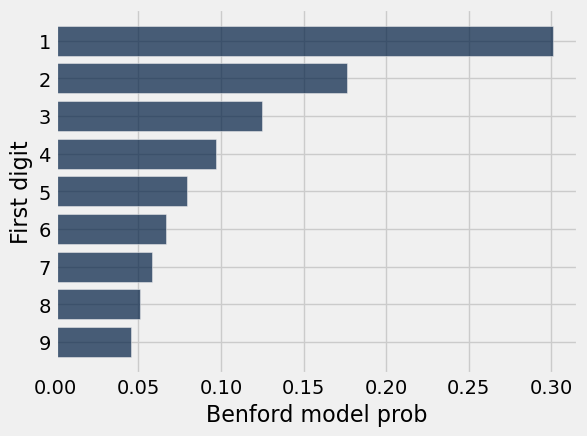

In [ ]:
benford.barh('First digit')

---

### Get First Digit

Use bracket notation to get get the first character of a string.

_The use of bracket notation here is just for an example. Bracket notation is a common way in Python to obtain information within a collection. This is similar to how we use `.item(0)` with arrays._

In [ ]:
a_string = 'data science'
a_string[0]

'd'

Try the same thing with an integer.

In [ ]:
# Uncomment this to see a TypeError
an_integer = 1234
#an_integer[0]

Explore the `first_digit` function.

In [ ]:
def first_digit(num):
    """Returns the first digit of the interger num."""
    return int(str(num)[0])

In [ ]:
first_digit(32)

3

---

### County Data

Load the `counties.csv` data. This data contains county population sizes from the 2010 Census.

In [ ]:
counties = Table.read_table('counties.csv')
counties = counties.where('SUMLEV', 50).select(5,6,9)\
                                       .relabeled(0,'State')\
                                       .relabeled(1,'County')\
                                       .relabeled(2,'Population')

counties

State,County,Population
Alabama,Autauga County,54684
Alabama,Baldwin County,183216
Alabama,Barbour County,27336
Alabama,Bibb County,22879
Alabama,Blount County,57344
Alabama,Bullock County,10886
Alabama,Butler County,20945
Alabama,Calhoun County,118443
Alabama,Chambers County,34111
Alabama,Cherokee County,25968


In [ ]:
counties.where('County', 'San Francisco County')

State,County,Population
California,San Francisco County,805825


---

### Demo: Benford's Law

* Apply `first_digit` to add a column to the `counties` table that shows the first digit of the population sizes.
* Visually compare the distribution of first digits from the `counties` data and Benford's proportions.

In [ ]:
first_digits = counties.apply(first_digit, 'Population')
counties = counties.with_column('First digit', first_digits)
counties.show(3)

State,County,Population,First digit
Alabama,Autauga County,54684,5
Alabama,Baldwin County,183216,1
Alabama,Barbour County,27336,2


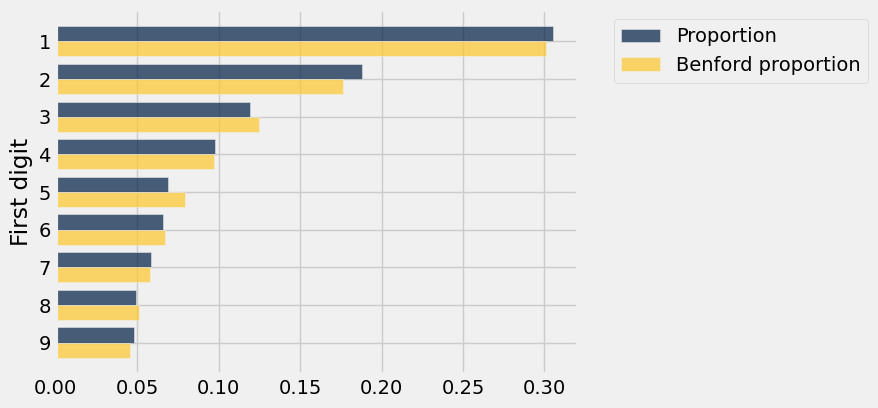

In [ ]:
num_counties = counties.num_rows
by_digit = counties.group('First digit')
proportions = by_digit.column('count') / num_counties
by_digit = by_digit.with_columns(
    'Proportion', proportions,
    'Benford proportion', benford_model
)
by_digit.drop('count').barh('First digit')

---

<!-- BEGIN QUESTION -->

Define hypotheses and a test statistic based on the above scenario that would allow you to test whether or not the distribution of proportions in `counties` is consistent with Benford's model. Based on your test statistic, which values (bigger or smaller) of the test statistic favor the alternative?

_Type your answer here, replacing this text._

<!-- END QUESTION -->

---

Calculate the observed TVD and create a distribution of simulated TVDs under the null hypothesis.

VB
step 1-test statistic
step 2-compute on our observed data/population
step 3-simulate the test statistic 10.000 times
step 4-plot this on graph to see difference

In [ ]:
def tvd(arr1, arr2):
    return np.sum(np.abs(arr1 - arr2)) / 2

In [ ]:
observed_tvd = tvd(proportions, benford_model)
observed_tvd

0.019227569718005835

In [ ]:
sample_proportions(num_counties, benford_model)

array([ 0.29439847,  0.18650541,  0.1257161 ,  0.09197963,  0.07638447,
        0.0709739 ,  0.05506047,  0.04742202,  0.05155952])

In [ ]:
simulated_frequencies = sample_proportions(num_counties, benford_model)
tvd(simulated_frequencies, benford_model)

0.024151819755194336

In [ ]:
def simulate_county_first_digits():
    simulated_frequencies = sample_proportions(num_counties, benford_model)
    return tvd(simulated_frequencies, benford_model)

In [ ]:
simulated_tvds = make_array()
reps = 10_000

for __ in np.arange(reps):
    simulated_tvds = np.append(simulated_tvds, simulate_county_first_digits())

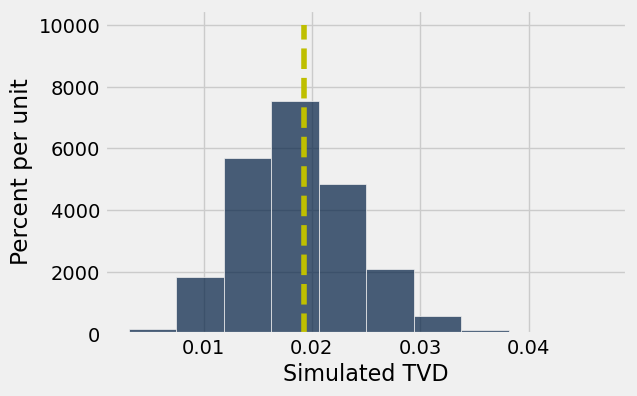

In [ ]:
Table().with_column('Simulated TVD', simulated_tvds).hist(0)
plt.plot([observed_tvd, observed_tvd], [0, 100], 'y--')
plt.show()

In [ ]:
benfords_p_value = np.count_nonzero(simulated_tvds >= observed_tvd) / reps
benfords_p_value

0.4326

In [ ]:
simulated_tvds = make_array()
reps = 100000

for __ in np.arange(reps):
    simulated_tvds = np.append(simulated_tvds, simulate_county_first_digits())

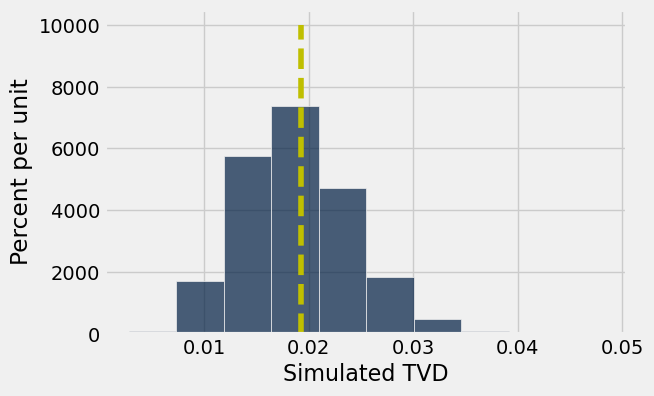

In [ ]:
Table().with_column('Simulated TVD', simulated_tvds).hist(0)
plt.plot([observed_tvd, observed_tvd], [0, 100], 'y--')
plt.show()

---

<!-- BEGIN QUESTION -->

Are the data consistent with the null hypothesis?

_Type your answer here, replacing this text._

<!-- END QUESTION -->

---

## Therapy Recovery Time

* Two groups of patients are being treated with different therapies.
* The patients were randomly assigned to the two therapies.
* One group receives Therapy A, and the other group receives Therapy B.
* Both therapies are effective at treating the patient's symptoms.
* The goal of this research is to determine which therapy is more effective in reducing recovery time.

---

### The Data

The following table `recovery` contains the therapy type and recovery time (in hours) for 200 patients.

In [ ]:
recovery = Table.read_table('recovery.csv')
recovery

---

### Demo: Comparing Mean Recovery Times

For the observed data, what are the two mean recovery times?

In [ ]:
therapy_A_mean_recovery_time = ...
therapy_B_mean_recovery_time = ...

print(f'The mean recovery times are:\n  \
Therapy A: {therapy_A_mean_recovery_time:.2f} hours\n  \
Therapy B: {therapy_B_mean_recovery_time:.2f} hours')

---

### Demo: Testing Therapy Recovery Time

<!-- BEGIN QUESTION -->

Create two hypotheses to use to test which therapy is more effective in reducing the recovery time.

_Type your answer here, replacing this text._

<!-- END QUESTION -->

---

Create a test statistic (function) to perform a hypothesis test, and use that function with `recovery` to calculate the observed test statistic.

In [ ]:
# Define the function
def test_stat(tbl):
    by_label = ...
    therapy_A_mean_recovery_time = ...
    therapy_B_mean_recovery_time = ...
    ...

# Apply the function to calculate the observed test statistic
observed_test_stat = ...
observed_test_stat

---

Simulate generating 1,000 data sets similar to `recovery` under the null hypothesis, calculate the test statistic for each simulation, and store the values in the array `simulated_test_stats`.

In [ ]:
simulated_test_stats = ...
...
    shuffled_labels = ...
    shuffled_tbl = ...
    simulated_test_stats = ...

---

Visualize the distribution of simulated test statistics with the observed test statistic and calculate the p-value.

In [ ]:
# Histogram
Table().with_column('Simulated Test Statistics', simulated_test_stats).hist(unit='Hour')
plt.plot([observed_test_stat, observed_test_stat], [0, 1], 'y--')
plt.show()

# p-value
p_value = ...
print(f'The p-value is {p_value}')

---

<!-- BEGIN QUESTION -->

What can you conclude from the results of this study?

_Type your answer here, replacing this text._

<!-- END QUESTION -->

---

## Hypothesis Test Concerns

The outcome of a hypothesis test can be affected by:
* The hypotheses you investigate:
    * How do you define your null distribution?
* The test statistic you choose:
    * How do you measure a difference between samples?
* The empirical distribution of the statistic under the null:
    * How many times do you simulate under the null distribution?
* The data you collected:
    * Did you happen to collect a sample that is similar to the population?
* The truth:
    * If the alternative hypothesis is true, how extreme is the difference?

---

## Hypothesis Test Effects

* Number of simulations:
    * large as possible: empirical distribution → true distribution
    * No new data needs to be collected (yay!)
* Number of observations:
    * A larger sample will lead you to reject the null more reliably if the alternative is in fact true.
* Difference from the null:
    * If truth is similar to the null hypothesis, then even a large sample may not provide enough evidence to reject the null.


---

## Attribution

This content is licensed under the <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License (CC BY-NC-SA 4.0)</a> and derived from the <a href="https://www.data8.org/">Data 8: The Foundations of Data Science</a> offered by the University of California, Berkeley.

<img src="./by-nc-sa.png" width=100px>